In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import torch
import torchvision
from torchvision  import transforms
import os
import glob

device = 'cuda' if torch.cuda.is_available() else 'cpu'
torch.manual_seed(42)
if device == 'cuda':
  torch.cuda.manual_seed_all(42)


In [3]:
device

'cuda'

In [4]:
root_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/'
train_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/test'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

In [5]:
#pytorch 데이터셋 클래스 실습
##1.라ㅣ브러리를 이용하기
# 이미저 전처리하기

# resize하기 ->(224,224)로 바꾸기
# tensor화 하기 픽셀값을 -> 0~1로바꾸기

In [6]:
Aug_imgs = transforms.Compose (
    [ transforms.Resize( (224,224) ), 
        # transforms.RandomCrop(180), #이미지를 랜덤으로 자른다.
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.ToTensor(),
     
     transforms.Normalize(mean=[0.485, 0.456, 0.406],
                          std=[0.229,0.224, 0.225])
    ]
)

Aug_train = torchvision.datasets.ImageFolder(root=train_path, transform = Aug_imgs) #어그멘테이션진행
Aug_test = torchvision.datasets.ImageFolder(root=test_path, transform = Aug_imgs)  #test셋은 어그멘테이션을 하지 않는다.

# Normalize

# (X-Mean)/std

# 1. ImageNet 데이터셋의 Mean, std를 이용한다. 
# 2. 지금 내가 가지고 있는 데ㅣ터셋의 통계값을 이용한다.(train)

In [7]:
# 1.000 -> 학습 x
# 2.aug -> 0.6 ~ 0.7 학습 o

In [8]:
train_loader = torch.utils.data.DataLoader(Aug_train, batch_size=4,
                                      shuffle=True, num_workers=0)
test_loader = torch.utils.data.DataLoader(Aug_test, batch_size=4,
                                      shuffle=True, num_workers=0)

In [10]:
# for data, label in train_loader: #trainloard는 값을 두개씩 뱉음 이미지랑 label
#   output = model(data,label)

In [11]:
label #->이미지 라벨(상어, 돌고래, 상어 상어) -> 원핫 인코딩

tensor([0, 2, 1, 2])

In [12]:
data[1]

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1179, -1.8782, -1.8782],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.0152, -2.0152],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

        [[ 0.9755,  0.9755,  0.9755,  ...,  1.0280,  1.2906,  1.2906],
         [ 0.9755,  0.9755,  0.9755,  ...,  1.0455,  1.2031,  1.2031],
         [ 0.9755,  0.9755,  0.9755,  ...,  1.0980,  1.0455,  1.0455],
         ...,
         [-0.5826, -0.5826, -0.5826,  ..., -0.7752, -0.7752, -0.7752],
         [-0.5826, -0.5826, -0.5826,  ..., -0.7752, -0.7752, -0.7752],
         [-0.5826, -0.5826, -0.5826,  ..., -0.7752, -0.7752, -0.7752]],

        [[ 0.9494,  0.9494,  0.9494,  ...,  0.7054,  1.3154,  1.3154],
         [ 0.9494,  0.9494,  0.9494,  ...,  0

In [13]:
data.shape #[4, 3, 224, 224] -> B C H W

torch.Size([4, 3, 224, 224])

In [14]:
# pytorch 데이터셋 클래스 실습

# 파이토치 데이터셋 클래스 직접 만들기
# 1. __init__생성자 필요함.
# 2.__getitem__ 필요함 -> 데이터를 읽는 역할(인덱스를 부여, iterable)
# 3.__len__필요함 -> 데이터 개수를 알려주는 역할.

In [15]:
from torch.utils.data import Dataset, DataLoader # 커스터마ㅣ징
import cv2
class Custom_dataset(Dataset): #mode -> 데이터 셋 종류
  def __init__(self, root_path, mode, transform=None): #생성자 특수메소드
    self.all_data = sorted(glob.glob(os.path.join(root_path, mode, '*', '*')))
    self.transform = transform #augmentation

  def __getitem__(self, index):
    if torch.is_tensor(index):
      index = index.tolist()

    data_path = self.all_data[index]
    image = cv2.imread(data_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #채널 축 : BGR -> RGB 변환

    #transform (Agumentation)
    if self.transform is not None:
      augmentation = self.transform(image = image)
      image = augmentation['image']

    # label 만들어주기 
    label = []
    if 'dolphin' in data_path.split('/')[-1]:
      label = 0
      
    if 'shark' in data_path.split('/')[-1]:
      label = 1
    
    if 'whale' in data_path.split('/')[-1]:
      label = 2

    return image, label

  
  def __len__(self):
    length = len(self.all_data)
    return length

In [16]:
#모든데이터 경로확인

import os
mode = 'test'
all_data = glob.glob(os.path.join(root_path, mode,'*','*'))
print(os.path.join(root_path, mode,'*','*'))
all_data[0]

/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/test/*/*


'/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/test/whale/whale_438.jpg'

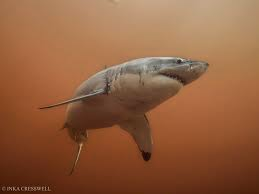

In [61]:
root_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/'
train_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/dna/week2/CV_seminar_project/output/test'

dolphin_dir = '/dolphin'
shark_dir = '/shark'
whale_dir = '/whale'

from PIL import Image as PILImage

pytorch_dataset_1 = Custom_dataset(root_path = root_path, mode='train')

from google.colab.patches import cv2_imshow
cv2_imshow(pytorch_dataset_1[500][0])

In [19]:
# 위에서까지 이미지가 잘 나왓으면 통과!
# 더 강력한 augmentation 툴 albumentation 이용하기.

In [22]:
import albumentations
import albumentations.pytorch
albumentations = albumentations.Compose([
    albumentations.Resize(224,224),
    albumentations.OneOf([
        albumentations.HorizontalFlip(p=0.8),
        albumentations.VerticalFlip(p=0.8),
        albumentations.RandomRotate90(p=0.8)
    ], p=1),
    #픽셀값 장난질
    albumentations.OneOf([
        albumentations.MotionBlur(p=0.8), #흐리게
        albumentations.OpticalDistortion(p=0.8), #왜곡
        albumentations.GaussNoise(p=0.8) #노이즈 추가
    ], p=1),
    # 밝기와 대비 변경 (대비를 올리면 어두운색은 더 어둡게, 밝은색은 더 밝게)
    albumentations.RandomBrightnessContrast(brightness_limit=(-0.3, 0.3), contrast_limit=(-0.3, 0.3), p=1)

    # albumentations.pytorch.transforms.ToTensorV2() #0~1 만들기
])

pytorch_dataset = Custom_dataset(root_path = root_path, mode='train',transform=albumentations)

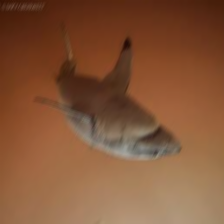

In [69]:
cv2_imshow(pytorch_dataset[500][0])

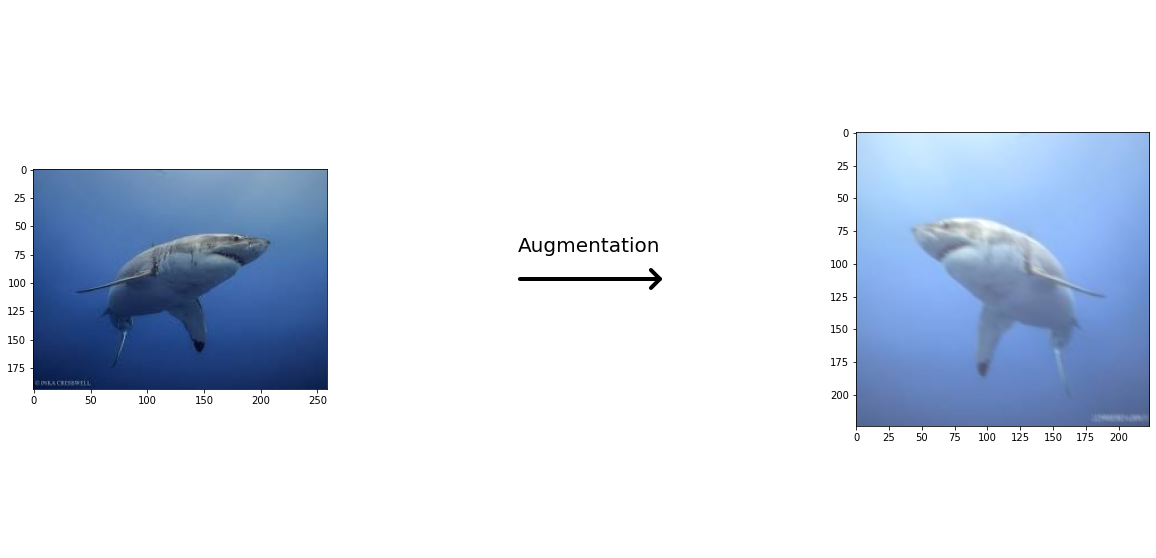

In [138]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

grid = gridspec.GridSpec(1,3)#그래프를 그릴 도화지 개수
plt.figure(figsize=(20,10))
plt.subplots_adjust(wspace= 0.4, hspace=0.4) #그래프 간의 거리 조절

ax0 = plt.subplot(grid[0])
ax1 = plt.subplot(grid[1])
ax2 = plt.subplot(grid[2])


# a = cv2_imshow()
ax0.imshow(pytorch_dataset_1[500][0])
ax1.axis('off')
ax1.text(0.25,0.55, 'Augmentation', fontsize=20)
ax1.annotate('', xytext=(0.25, 0.5), xy=(0.75, 0.5), 
        arrowprops=dict(arrowstyle='->, head_width=0.9, head_length=0.9', facecolor='blue', lw=4))
ax2.imshow(pytorch_dataset[500][0])